Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

## Import requrired libraries....

In [1]:
#import required libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the Algerian Forestdata

In [3]:
df = pd.read_csv(r'E:\\himanshu_2022\\Download\\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
# drop rows which have no information..
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [6]:
# creating region feature..
df.loc[:122,'region'] = '0'
df.loc[122:, 'region'] = '1'

In [7]:
#datatype & describe...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [8]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,0
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [10]:
#stripping the names of the column...
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [11]:
df=df.astype(str)

In [12]:
#somes values in colums also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[feature]= df[feature].str.replace(" ","")

In [13]:
# Adding the region
df['Region']= [1 if i <= 121 else 0 for i in df.index]

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire,0,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire,0,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire,0,1


In [15]:
# dropping the year columns it has same data throuhout the dataset
df.drop(['year'], axis=1, inplace=True)

In [17]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,Region
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0,1
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire,0,1
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0,1
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire,0,1
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1,0
240,27,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,notfire,1,0
241,28,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,1,0
242,29,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,1,0


# finding missing values

In [18]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
Region         0
dtype: int64

In [19]:
# here we have no null value.

In [20]:
df['Classes'].unique()

array(['notfire', 'fire', 'nan'], dtype=object)

In [ ]:
#here if you we observe there are only 'fire' and 'not fire' values are present here we need to convert other thing to above
#two values.

In [22]:
df['Classes'] = df['Classes'].map(lambda x: x.strip())

In [23]:
df['Classes'].value_counts()

fire       137
notfire    106
nan          1
Name: Classes, dtype: int64

In [24]:
df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,Region
0,01,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0,1
1,02,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire,0,1
2,03,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0,1
3,04,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire,0,1
4,05,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1,0
240,27,09,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,notfire,1,0
241,28,09,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,1,0
242,29,09,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,1,0


In [28]:
x_col = ['day', 'month','RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes_not fire']
print(x_col)
y_col = ['Temperature']
print(y_col)

['day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Classes_not fire']
['Temperature']


# EDA for Algerian Forest dataset

In [ ]:
# Numerical and Continuous features

In [ ]:
# categorical features

In [32]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes=='O' ]

#catgorical features with group by operation with count...
for feature in categorical_feature:
    print(df.groupby(feature)['region'].value_counts())

DC     region
10     0.0       2
10.2   0.0       1
10.4   1.0       1
10.5   1.0       1
100.7  0.0       1
                ..
94.7   0.0       1
96.8   1.0       1
97.3   1.0       1
98.6   0.0       1
99     1.0       1
Name: region, Length: 213, dtype: int64
FWI   region
0     0.0       7
      1.0       2
0.1   0.0       7
      1.0       2
0.2   0.0       3
               ..
9.7   0.0       1
9.8   1.0       1
9.9   0.0       1
      1.0       1
fire  1.0       1
Name: region, Length: 161, dtype: int64
Classes  region
fire     1.0       78
         0.0       59
nan      1.0        1
notfire  0.0       63
         1.0       43
Name: region, dtype: int64


In [ ]:
# Numerical features

In [33]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print(numerical_features)

['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'region', 'Region']


In [34]:
df[numerical_features].nunique()

day             31
month            4
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
ISI            106
BUI            174
region           2
Region           2
dtype: int64

In [ ]:
# Seggregating discrete and continuous variable

In [ ]:
# Discrete numercal features

In [35]:
# here is the assumption to consider if discrete values is less tha 35 that will be consider continuous features...
descrete_features = [feature for feature in numerical_features if len(df[feature].unique())<35]
descrete_features


['day', 'month', 'Temperature', 'Ws', 'region', 'Region']

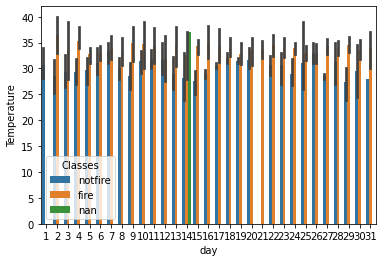

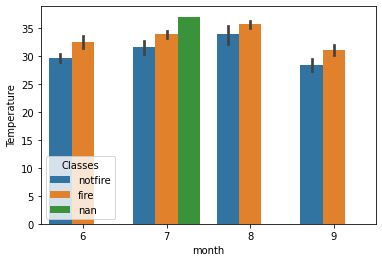

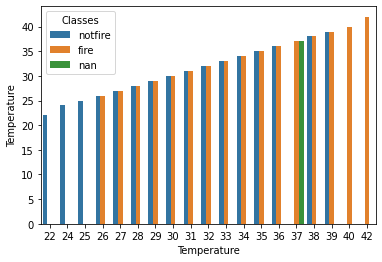

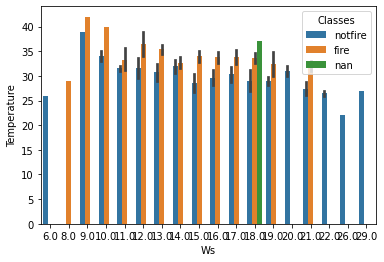

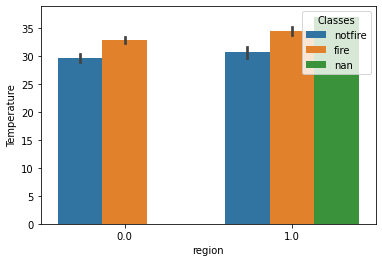

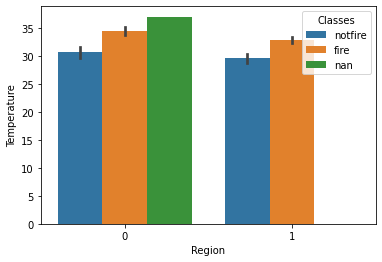

In [43]:
for features in descrete_features:
    sns.barplot(data = df, x=features, y="Temperature" , hue='Classes')
    plt.show()

In [44]:
continuous_features=[feature for feature in numerical_features if feature not in descrete_features]
print(continuous_features)

['RH', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']


In [56]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region,Region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.177727,0.517229,4.662229e-16,-4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.061680,0.085822,-9.586232e-17,6.718556e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,2.734961e-01,-2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-4.064239e-01,4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-1.768290e-01,1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-4.108006e-02,4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,2.246798e-01,-2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,1.910937e-01,-1.910937e-01
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,2.684206e-01,-2.684206e-01
BUI,5.172292e-01,8.582162e-02,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,8.736964e-02,-8.736964e-02


In [57]:
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.500000,0.500000
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.501028,0.501028
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,0.500000,0.500000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000,1.000000


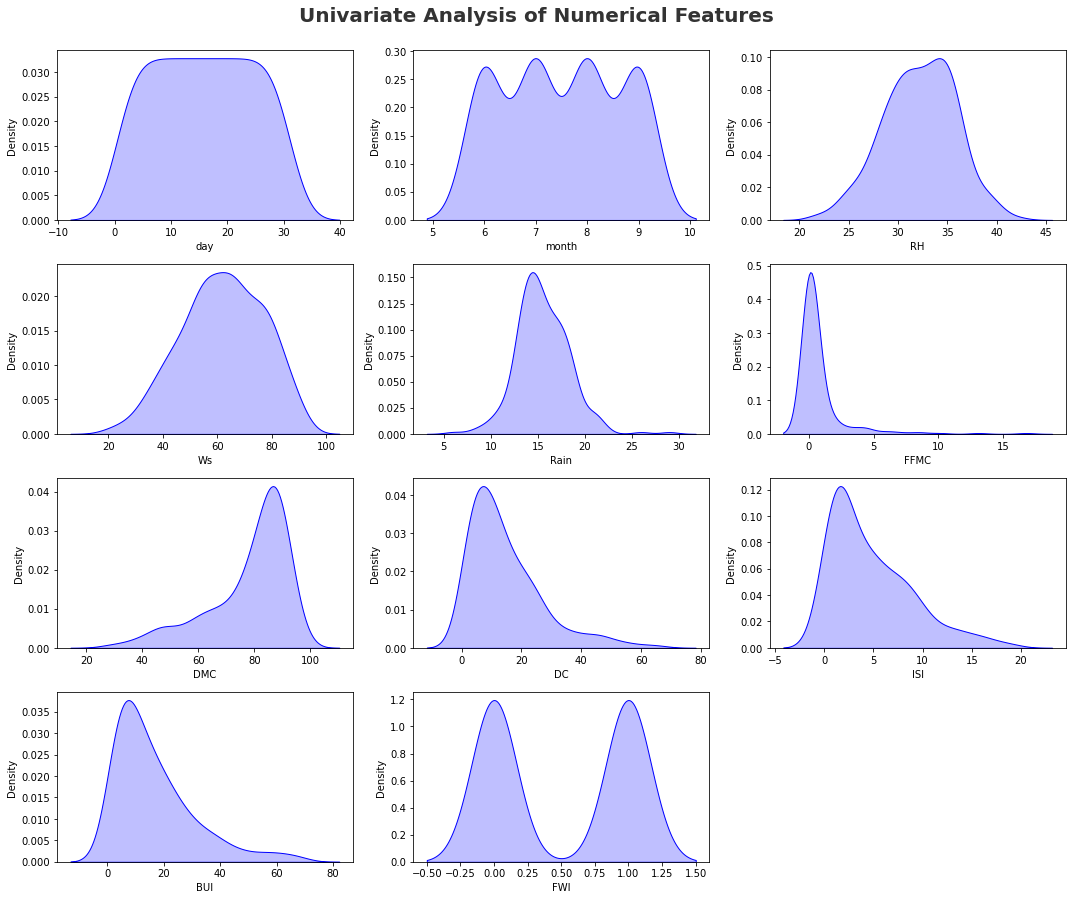

In [59]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)-1):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
    plt.xlabel(x_col[i])
    plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

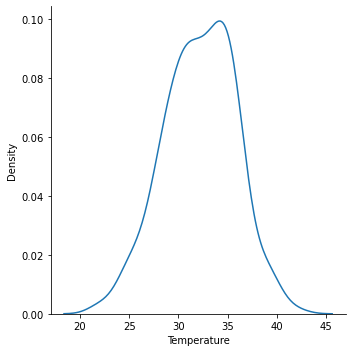

In [60]:
plt.figure(figsize=(15, 15))
sns.displot(df['Temperature'],kind='kde')
plt.show()

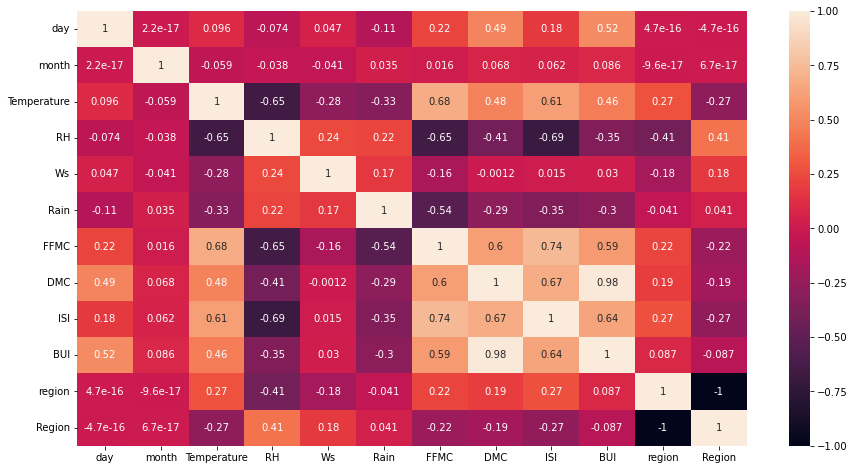

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [62]:
#We can obaserve month, RH,Ws,Rain,Region and Classes are -vely correlated with temparature
#We can observer that day, FFMC,DMC,DC,ISI,BUI and FWI are +vely correlated with tempareture
#If we observe heatmap carefully BUI has correlation with DC and DMC almost 1 so any of feature is sufficient for the recongization of temprature

Text(0, 0.5, 'Temperature')

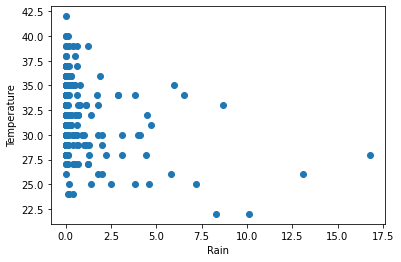

In [63]:
plt.scatter(df['Rain'],df['Temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

In [64]:
#from scatter plot we observe that less rain fall more likely high temprature.

Text(0, 0.5, 'Temperature')

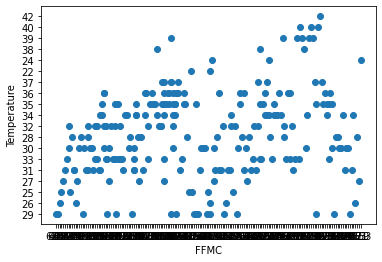

In [65]:
plt.scatter(encoded_data['FFMC'],encoded_data['Temperature'])
plt.xlabel('FFMC')
plt.ylabel('Temperature')

In [66]:
#FFMC has the linear relationship with the temprature

Text(0, 0.5, 'Temperature')

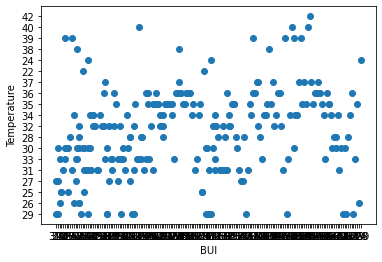

In [67]:
plt.scatter(encoded_data['BUI'],encoded_data['Temperature'])
plt.xlabel('BUI')
plt.ylabel('Temperature')

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

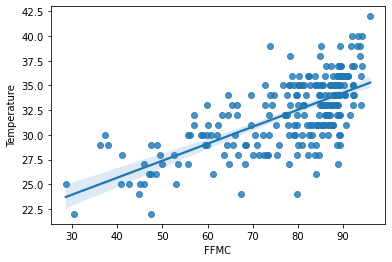

In [68]:
sns.regplot(x='FFMC',y='Temperature',data=df)

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

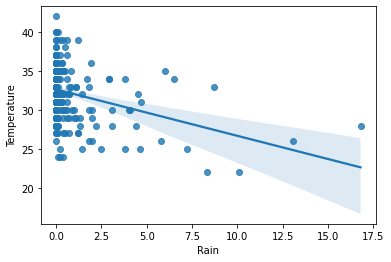

In [69]:
sns.regplot(x='Rain',y='Temperature',data=df)

<AxesSubplot:xlabel='Rain'>

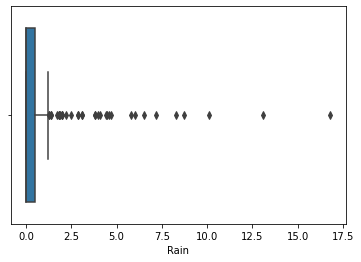

In [70]:
sns.boxplot(df['Rain'])

<AxesSubplot:xlabel='FFMC'>

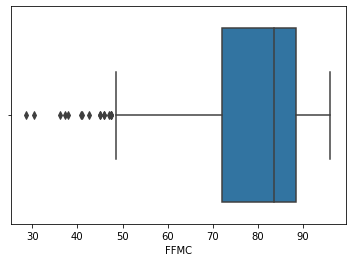

In [71]:
sns.boxplot(df['FFMC'])

<AxesSubplot:xlabel='BUI'>

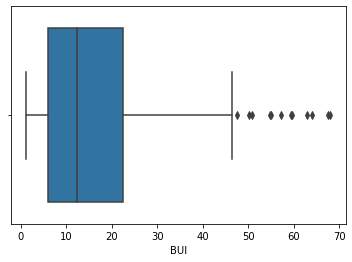

In [72]:
sns.boxplot(df['BUI'])

In [74]:
X = df[numerical_features]
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region,Region
0,1,6,29,57,18.0,0.0,65.7,3.4,1.3,3.4,0.0,1
1,2,6,29,61,13.0,1.3,64.4,4.1,1.0,3.9,0.0,1
2,3,6,26,82,22.0,13.1,47.1,2.5,0.3,2.7,0.0,1
3,4,6,25,89,13.0,2.5,28.6,1.3,0.0,1.7,0.0,1
4,5,6,27,77,16.0,0.0,64.8,3.0,1.2,3.9,0.0,1


In [75]:
y = df['Temperature']
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int32

# create a model

In [76]:
# train test split
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
...    X, y, test_size=0.33, random_state=10)

In [78]:
X_train

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region,Region
237,24,9,26,49,6.0,2.0,61.3,11.9,0.6,11.9,1.0,0
78,18,8,36,54,18.0,0.0,89.4,20.0,9.7,27.5,0.0,1
25,26,6,31,64,18.0,0.0,86.8,17.8,6.7,21.6,0.0,1
124,3,6,29,80,14.0,2.0,48.7,2.2,0.3,2.6,1.0,0
176,25,7,39,64,9.0,1.2,73.8,11.7,1.1,11.4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,34,69,13.0,0.0,85.0,8.2,4.0,8.2,0.0,1
15,16,6,29,89,13.0,0.7,36.1,1.7,0.0,2.2,0.0,1
228,15,9,32,51,13.0,0.0,88.7,16.0,6.9,17.8,1.0,0
125,4,6,30,64,14.0,0.0,79.4,5.2,2.2,5.6,1.0,0


In [79]:
y_train

237    26
78     36
25     31
124    29
176    39
       ..
64     34
15     29
228    32
125    30
9      28
Name: Temperature, Length: 163, dtype: int32

In [80]:
X_train.shape

(163, 12)

In [81]:
y_train.shape

(163,)

In [82]:
# standarding the featues using Standard Scaler feature
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
X_train = scaler.fit_transform(X_train)

In [85]:
X_test = scaler.transform(X_test)

In [86]:
X_train

array([[ 1.0627621 ,  1.33562856, -1.77085211, ..., -0.32535487,
         0.98176139, -0.98176139],
       [ 0.34495731,  0.44338489,  1.09557186, ...,  0.76565444,
        -1.01857744,  1.01857744],
       [ 1.30203036, -1.34110244, -0.33764012, ...,  0.35302912,
        -1.01857744,  1.01857744],
       ...,
       [-0.01394508,  1.33562856, -0.05099773, ...,  0.08727045,
         0.98176139, -0.98176139],
       [-1.32992053, -1.34110244, -0.62428252, ..., -0.76595478,
         0.98176139, -0.98176139],
       [-0.61211574, -1.34110244, -1.19756732, ..., -0.27639932,
        -1.01857744,  1.01857744]])

In [87]:
X_test

array([[-4.92481607e-01, -4.48858777e-01,  5.22287067e-01,
        -3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -7.33442383e-01,
        -6.82030988e-01,  9.81761387e-01, -9.81761387e-01],
       [ 1.90020102e+00, -4.48858777e-01,  8.08929464e-01,
         1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  4.94418103e-01,
         1.72378441e+00, -1.01857744e+00,  1.01857744e+00],
       [-1.68882292e+00,  4.43384889e-01,  1.09557186e+00,
        -1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -6.38991577e-01,
        -8.28897625e-01, -1.01857744e+00,  1.01857744e+00],
       [-1.44955466e+00,  4.43384889e-01,  8.08929464e-01,
         7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -7.09829682e-01,
        -7.72948430e-01, -1.01857744e+00,  1.01857744e+00],
       [-7.31749870e-01,  4.43384889e-01,  8.0892946

In [88]:
X_train.shape

(163, 12)

In [89]:
X_test.shape

(81, 12)

# Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
regression = LinearRegression()
regression

LinearRegression()

In [92]:
regression.fit(X_train,y_train)

LinearRegression()

In [94]:
print(regression.coef_)

[-1.61712413e-16  1.46082587e-15  3.48866745e+00 -4.53554365e-16
 -1.26830721e-15 -7.32383662e-17  4.54588763e-16  4.39762902e-15
  3.24382608e-15 -3.77002781e-15 -6.14938608e-16 -7.17329021e-16]


In [95]:
print(regression.intercept_)

32.17791411042945


In [96]:
# prediction for testdata
reg_prd = regression.predict(X_test)
reg_prd

array([34., 35., 36., 35., 35., 36., 36., 35., 29., 32., 36., 30., 35.,
       34., 35., 34., 35., 25., 38., 36., 31., 30., 34., 36., 39., 28.,
       36., 32., 26., 31., 26., 29., 33., 34., 31., 28., 30., 31., 24.,
       36., 35., 37., 31., 28., 40., 35., 28., 36., 36., 29., 30., 31.,
       36., 31., 28., 31., 35., 37., 33., 29., 33., 32., 29., 26., 32.,
       40., 29., 27., 37., 32., 32., 24., 30., 24., 33., 33., 33., 29.,
       33., 33., 22.])

# Assumption of Linear Regression

Text(0, 0.5, 'Test Predict Data')

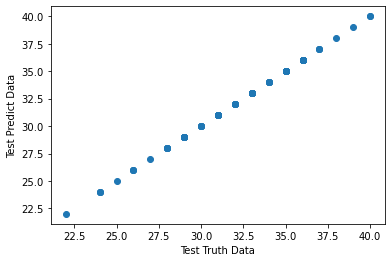

In [98]:
# relation between real and pred data 
plt.scatter(y_test,reg_prd) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [99]:
# The relation b/w test predicted data and test truth data are in the linear

In [100]:
## calculate residual
residual = y_test-reg_prd
residual

162    0.000000e+00
60     0.000000e+00
61     0.000000e+00
63     0.000000e+00
69     0.000000e+00
           ...     
169    0.000000e+00
232   -7.105427e-15
144    7.105427e-15
208   -1.421085e-14
105    7.105427e-15
Name: Temperature, Length: 81, dtype: float64

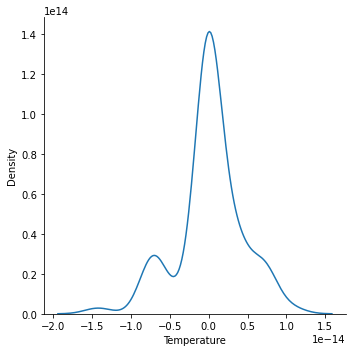

In [101]:
# distribution of residual are approxi normal fashion 
sns.displot(residual,kind='kde')    #little sked due to outliers

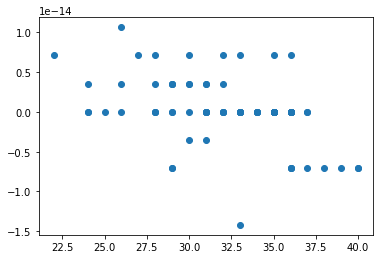

In [102]:
# Scatter plot with prediction and residuals
#uniform distributin
plt.scatter(reg_prd,residual)

In [103]:
# Data b/w the reg_prd and residual are in random in nature

# performance Matrics

In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,reg_prd))
print(mean_absolute_error(y_test,reg_prd))
print(np.sqrt(mean_squared_error(y_test,reg_prd)))

1.7140681397394825e-29
2.456197111269482e-15
4.140130601490106e-15


In [105]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_prd)
print(score)

1.0


In [106]:
## Adjusted R2 need to write
# need to perform
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)
0.5441420406178656

1.0


0.5441420406178656

# Ridge Regression

In [107]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)

In [108]:
ridge_reg

Ridge(alpha=0.1)

In [109]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [110]:
print(ridge_reg.coef_)

[-1.79002917e-04 -3.83211814e-04  3.48360093e+00 -1.69334938e-03
 -8.36795759e-04 -3.29067784e-04  1.51250775e-03 -1.63883143e-03
  2.97933686e-04  2.28988961e-03  1.66093109e-04 -1.66093109e-04]


In [111]:
print(ridge_reg.intercept_)

32.17791411042945


In [112]:
rid_pred =ridge_reg.predict(X_test)
rid_pred

array([33.99712362, 34.99761415, 35.99600601, 34.99509246, 34.99684071,
       35.99828257, 35.99649439, 34.99786216, 29.00428681, 32.00158122,
       35.99659818, 29.99590111, 35.00028049, 33.99324376, 34.99594201,
       33.99754811, 34.9994296 , 25.00340298, 37.99756301, 35.99792349,
       31.00299203, 30.00579059, 33.99966155, 35.99592589, 38.99565516,
       28.00209445, 35.99397003, 32.0004041 , 26.00127172, 31.00187377,
       25.99896638, 28.99691006, 33.00181835, 33.99753799, 31.00302464,
       28.00372162, 29.99858152, 31.00198297, 24.00460284, 35.99909446,
       34.99644993, 36.99572044, 31.00500362, 28.00463342, 39.99486644,
       34.99851378, 27.99449941, 35.99903124, 35.99732687, 29.00034114,
       30.00193893, 31.00209503, 35.99964068, 31.00208359, 28.00264575,
       30.99818993, 34.99682727, 36.99927608, 32.99766926, 29.00613473,
       32.99896026, 32.00115472, 29.00346494, 25.99830485, 31.99919206,
       39.99456089, 29.00109327, 27.00392743, 36.99717711, 32.00

Text(0, 0.5, 'Test Predict Data')

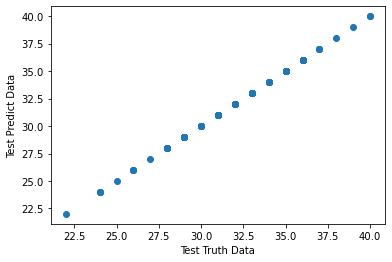

In [113]:
# relation between real and pred data 
plt.scatter(y_test,rid_pred) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [114]:
## calculate residual
residual = y_test-rid_pred
residual

162    0.002876
60     0.002386
61     0.003994
63     0.004908
69     0.003159
         ...   
169    0.000327
232   -0.010180
144    0.001585
208   -0.005041
105   -0.003404
Name: Temperature, Length: 81, dtype: float64

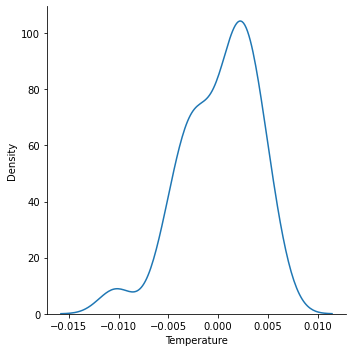

In [115]:
# distribution of residual are approxi normal fashion 
sns.displot(residual,kind='kde')    #little left-sked due to outliers

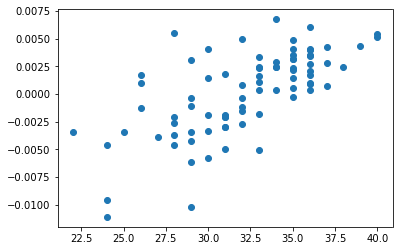

In [116]:
# Scatter plot with prediction and residuals
#uniform distributin
plt.scatter(rid_pred,residual)

# Performance Metric

In [117]:
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred))
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

1.3950541908077633e-05
0.0030824427427230943
0.003735042423865843


In [118]:
score = r2_score(y_test,rid_pred)
print(score)

0.9999990774909244


In [119]:
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

0.999999029568375


# Lasso regerssion

In [120]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso

Lasso(alpha=0.1)

In [121]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [122]:
print(lasso.coef_)

[ 0.          0.          3.38866745 -0.         -0.         -0.
  0.          0.          0.          0.          0.         -0.        ]


In [123]:
print(lasso.intercept_)

32.17791411042945


In [124]:
ls_prd = lasso.predict(X_test)

Text(0, 0.5, 'Test Predict Data')

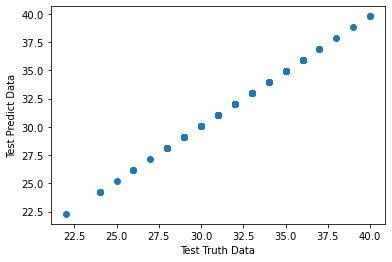

In [125]:
# relation between real and pred data 
plt.scatter(y_test,ls_prd) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [126]:
## calculate residual
residual = y_test-ls_prd
residual

162    0.052229
60     0.080893
61     0.109557
63     0.080893
69     0.080893
         ...   
169    0.023564
232   -0.091092
144    0.023564
208    0.023564
105   -0.291742
Name: Temperature, Length: 81, dtype: float64

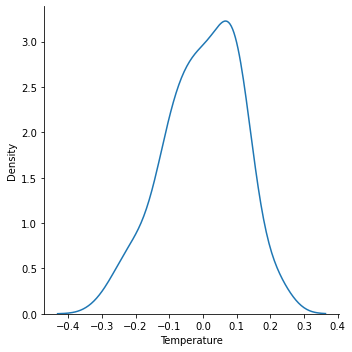

In [127]:
# distribution of residual are approxi normal fashion 
sns.displot(residual,kind='kde') 

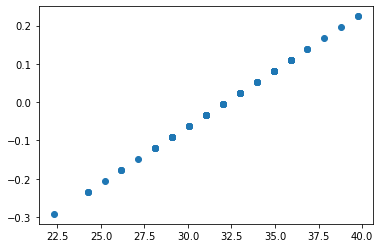

In [131]:
#Scatterplot with prediction and residuals
#uniform distributin
plt.scatter(ls_prd,residual)

#  performance Metirc

In [132]:
print(mean_squared_error(y_test,ls_prd))
print(mean_absolute_error(y_test,ls_prd))
print(np.sqrt(mean_squared_error(y_test,ls_prd)))

0.012425389172212573
0.09159183103788726
0.11146922971032218


In [133]:
score = r2_score(y_test,ls_prd)
print(score)

0.9991783448733205


In [134]:
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

0.9991356614901163


# Elastic Net

In [135]:
from sklearn.linear_model import ElasticNet
el_reg = ElasticNet(random_state=0)
el_reg

ElasticNet(random_state=0)

In [136]:
el_reg.fit(X_train,y_train)

ElasticNet(random_state=0)

In [137]:
print(el_reg.coef_)

[ 0.          0.          1.69313456 -0.278179   -0.         -0.
  0.31099458  0.          0.09384768  0.          0.         -0.        ]


In [138]:
print(el_reg.intercept_)

32.17791411042945


In [139]:
el_prd = el_reg.predict(X_test)
el_prd

array([33.04586716, 33.7624045 , 34.31305735, 33.44264737, 33.86100914,
       34.5790704 , 34.5638337 , 33.72556027, 30.56664901, 32.29401964,
       34.46228893, 30.36025098, 34.35412409, 32.5373541 , 33.85773788,
       33.10999733, 33.79034458, 27.608486  , 36.0902134 , 34.62290748,
       31.68327751, 31.53476437, 33.57120894, 34.30176215, 36.64350934,
       29.32856607, 34.06567615, 32.30285759, 28.11015181, 31.45991518,
       28.11943064, 29.24932139, 32.98841493, 33.20422576, 31.78611074,
       29.95282332, 30.32814999, 31.70863874, 27.04732548, 34.65053252,
       33.75637894, 34.97675407, 32.44500455, 29.97865526, 36.77466538,
       33.97766484, 29.19578427, 34.71113219, 34.48053345, 29.93996431,
       30.85301662, 31.66040754, 34.82383875, 31.58611693, 29.87338276,
       31.20079781, 33.55239779, 35.4517782 , 32.38906201, 31.20758737,
       32.56148244, 32.10124236, 30.29288944, 28.06692303, 32.0636602 ,
       37.02656459, 30.18502978, 29.32855002, 35.01121062, 32.41

Text(0, 0.5, 'Test Predict Data')

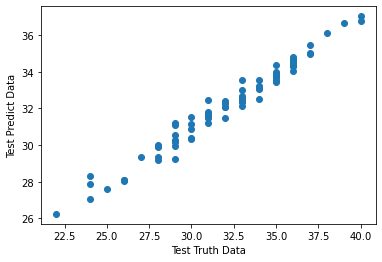

In [140]:
# relation between real and pred data 
plt.scatter(y_test,el_prd) # if you get linear manner it is good linear model
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predict Data')

In [141]:
## calculate residual
residual = y_test-el_prd
residual

162    0.954133
60     1.237595
61     1.686943
63     1.557353
69     1.138991
         ...   
169    0.340779
232   -2.113349
144    0.507487
208   -0.535133
105   -4.244783
Name: Temperature, Length: 81, dtype: float64

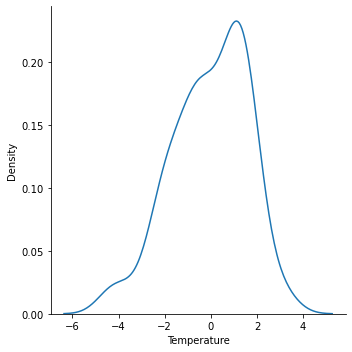

In [142]:
# distribution of residual are approxi normal fashion 
sns.displot(residual,kind='kde')

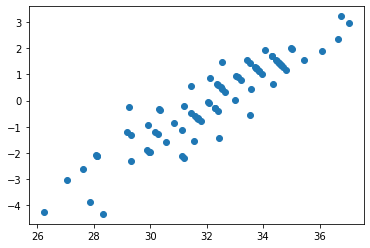

In [143]:
# Scatter plot with prediction and residuals
#uniform distributin
plt.scatter(el_prd,residual)

# performance Metrics

In [144]:
print(mean_squared_error(y_test,el_prd))
print(mean_absolute_error(y_test,el_prd))
print(np.sqrt(mean_squared_error(y_test,el_prd)))

2.6230598317246563
1.34485712693691
1.6195863149967205


In [145]:
score = r2_score(y_test,el_prd)
print(score)

0.8265446233954981


In [146]:
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print(adjR)

0.8175339544809785
